# Data Analysis with BigQuery

In this section, we'll utilize BigQuery to analyze the data of Research Payments NCRE 2023. Here's what the author has done to prepare for data anlaysis in the notebook:

* The data originally stands as an external table, so the author execute the main query (will be shown below) and export it to a table `ncre2023-cleaned`. A native table inside BigQuery will make it easier to access for the purpose of analysis (as in execution of queries) and dashboard. (Image 1)

* 


We've made a service account on Google Cloud and export the table 

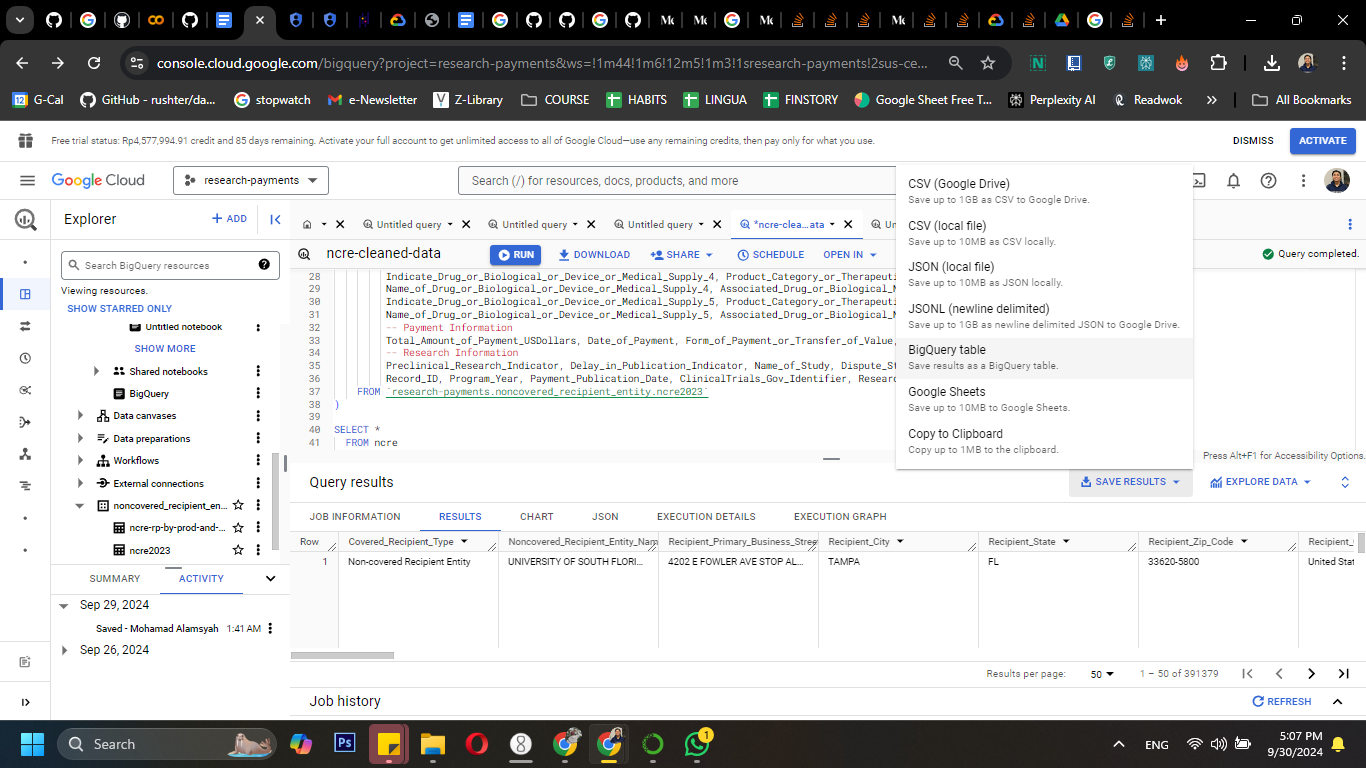

In [1]:
from IPython.display import Image
Image('docs-bigquery-native-table.png')

In [2]:
# !pip install google-cloud
# !pip install google-cloud-bigquery[pandas]
# !pip install google-cloud-storage
# !pip install pandas-gbq
# !pip install bigquery-magics
# !pip install pydata_google_auth

In [3]:
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account

import matplotlib.pyplot as plt

In [4]:
credentialsPath = r'C:\Users\acer\Downloads\BigQuery\research-payments-data-analyst-1-cred.json'

credentials = service_account.Credentials.from_service_account_file(credentialsPath)
project_id = 'research-payments'

client = bigquery.Client(
    credentials=credentials,
    project=project_id)

## Main Query

Below is the main query `ncre` as the cleaned data, and saved as `ncre2023-cleaned` for query execution and dashboard purposes in Tableau. 

In [5]:
query1 = """
WITH ncre AS (
  SELECT -- Teaching Hospital's Information
         Covered_Recipient_Type, Noncovered_Recipient_Entity_Name,
         Recipient_Primary_Business_Street_Address_Line1, Recipient_City, 
         Recipient_State, Recipient_Zip_Code, Recipient_Country, 
         -- Main Principal Investigator's Information (PI_1)
         Principal_Investigator_1_Covered_Recipient_Type,
         Principal_Investigator_1_Profile_ID, Principal_Investigator_1_NPI,
         Principal_Investigator_1_First_Name, Principal_Investigator_1_Middle_Name, 
         Principal_Investigator_1_Last_Name, Principal_Investigator_1_Name_Suffix,
         Principal_Investigator_1_Business_Street_Address_Line1, Principal_Investigator_1_Business_Street_Address_Line2,
         Principal_Investigator_1_City, Principal_Investigator_1_State, 
         Principal_Investigator_1_Zip_Code, Principal_Investigator_1_Country,
         Principal_Investigator_1_Primary_Type_1, Principal_Investigator_1_Specialty_1,
         Principal_Investigator_1_License_State_code1, Principal_Investigator_1_License_State_code2,
         Principal_Investigator_1_License_State_code3, Principal_Investigator_1_License_State_code4,
         Principal_Investigator_1_License_State_code5, 
         -- Applicable Manufacturer or Applicable GPO's Information (Prod_1)
         Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,
         Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,
         Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country, Related_Product_Indicator, 
         Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1, Product_Category_or_Therapeutic_Area_1, 
         Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1, Associated_Drug_or_Biological_NDC_1, Associated_Device_or_Medical_Supply_PDI_1,
         Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2, Product_Category_or_Therapeutic_Area_2, 
         Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2, Associated_Drug_or_Biological_NDC_2, Associated_Device_or_Medical_Supply_PDI_2,
         Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3, Product_Category_or_Therapeutic_Area_3, 
         Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3, Associated_Drug_or_Biological_NDC_3, Associated_Device_or_Medical_Supply_PDI_3,
         Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4, Product_Category_or_Therapeutic_Area_4, 
         Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4, Associated_Drug_or_Biological_NDC_4, Associated_Device_or_Medical_Supply_PDI_4,
         Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5, Product_Category_or_Therapeutic_Area_5, 
         Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5, Associated_Drug_or_Biological_NDC_5, Associated_Device_or_Medical_Supply_PDI_5,
         -- Payment Information
         Total_Amount_of_Payment_USDollars, Date_of_Payment, Form_of_Payment_or_Transfer_of_Value, Expenditure_Category1,
         -- Research Information
         Preclinical_Research_Indicator, Delay_in_Publication_Indicator, Name_of_Study, Dispute_Status_for_Publication,
         Record_ID, Program_Year, Payment_Publication_Date, ClinicalTrials_Gov_Identifier, Research_Information_Link, Context_of_Research
    FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
)

SELECT * 
  FROM ncre
"""

In [6]:
results = client.query(query1)

In [7]:
df1 = results.to_dataframe(create_bqstorage_client=False)

In [8]:
df1.shape

(391379, 72)

In [9]:
df1.head()

,Covered_Recipient_Type,Noncovered_Recipient_Entity_Name,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Principal_Investigator_1_Covered_Recipient_Type,Principal_Investigator_1_Profile_ID,Principal_Investigator_1_NPI,...,Preclinical_Research_Indicator,Delay_in_Publication_Indicator,Name_of_Study,Dispute_Status_for_Publication,Record_ID,Program_Year,Payment_Publication_Date,ClinicalTrials_Gov_Identifier,Research_Information_Link,Context_of_Research
0,Non-covered Recipient Entity,UNIVERSITY OF SOUTH FLORIDA,4202 E FOWLER AVE STOP ALN147,TAMPA,FL,33620-5800,United States,Covered Recipient Physician,1013175,1821000944.0,...,False,False,"A PHASE 1/2A, CONTROLLED, RANDOMIZED, MULTICEN...",False,1042591469,2023,2024-06-28,NCT04765202,N/A,Research funding to Study site--payment is not...
1,Non-covered Recipient Entity,WAKE FOREST UNIVERSITY SCHOOL OF MEDICINE,475 VINE ST,WINSTON SALEM,NC,27101,United States,Covered Recipient Physician,801642,1396720678.0,...,False,False,EX9536-4773,False,1007181805,2023,2024-06-28,N/A,N/A,N/A
2,Non-covered Recipient Entity,SAN FERNANDO VALLEY INSTITUTE,22110 ROSCOE BLVD,WEST HILLS,CA,91304,United States,Covered Recipient Physician,65906,1467464404.0,...,False,False,NN9535-4321,False,1007620291,2023,2024-06-28,N/A,N/A,N/A
3,Non-covered Recipient Entity,SOUTH BROWARD RESEARCH,1 SW 129TH AVE,PEMBROKE PINES,FL,33027,United States,Covered Recipient Physician,58063,1295761286.0,...,False,False,NN9535-4820,False,1007836777,2023,2024-06-28,N/A,N/A,N/A
4,Non-covered Recipient Entity,Boeson Research LLC,2831 Fort Missoula Rd,Missoula,MT,59804,United States,Covered Recipient Physician,922585,1659403038.0,...,False,False,A PHASE 3 RANDOMIZED DOUBLEBLINDED PLACEBOCONT...,False,1045884573,2023,2024-06-28,N/A,N/A,N/A


## Research Payments by State

In [10]:
query2 = """
-- Research Payments by State
SELECT Recipient_State AS state,
       COUNT(UPPER(Recipient_State)) AS city_count, 
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 1) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
 GROUP BY ALL
 ORDER BY sum_rp DESC
"""

In [11]:
results = client.query(query2)

In [12]:
df2 = results.to_dataframe(create_bqstorage_client=False)

In [13]:
df2

,state,city_count,sum_rp
0,TX,54858,314494540.1
1,FL,50803,291260871.4
2,NY,21674,287103630.4
3,MD,7030,275460089.1
4,CA,36514,263751553.7
5,MA,8341,145486523.5
6,PA,11521,139666490.2
7,IL,9589,133848899.2
8,NC,17243,121694498.6
9,TN,12673,87787609.9


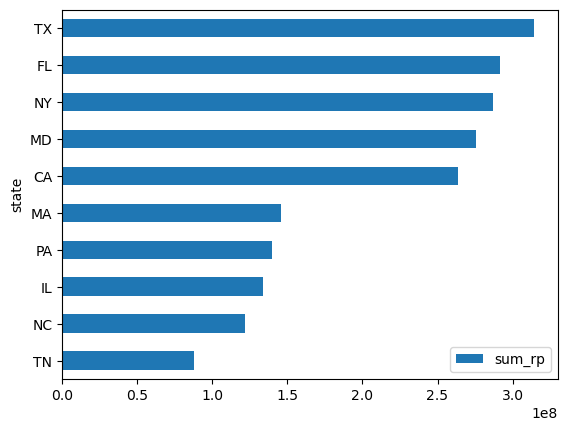

In [14]:
# Top 10, horizontal bar chart
df2[:10].plot.barh('state', 'sum_rp')
plt.gca().invert_yaxis()

## Research Payments by City

In [15]:
query3 = """
-- Research Payments by City
SELECT UPPER(Recipient_City) AS city,
       Recipient_State AS state,
       COUNT(UPPER(Recipient_City)) AS city_count, 
       -- SELECT ( ) -- Highest Therapeutic Area on the City
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 1) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
 GROUP BY ALL
 ORDER BY sum_rp DESC
"""

In [16]:
results = client.query(query3)

In [17]:
df3 = results.to_dataframe(create_bqstorage_client=False)

In [18]:
df3

,city,state,city_count,sum_rp
0,NEW YORK,NY,9296,190493538.6
1,ROCKVILLE,MD,439,142959108.3
2,BOSTON,MA,4797,122723275.8
3,CHICAGO,IL,5168,101211388.5
4,HOUSTON,TX,9932,76436263.4
...,...,...,...,...
2320,PENNSAUKEN,NJ,1,22.9
2321,EAST PEORIA,IL,1,22.9
2322,BUCYRUS,OH,1,16.0
2323,RED LION,PA,1,16.0


In [19]:
df3['city_state'] = [', '.join(i) 
    for i in zip(df3['city'], df3['state'])]

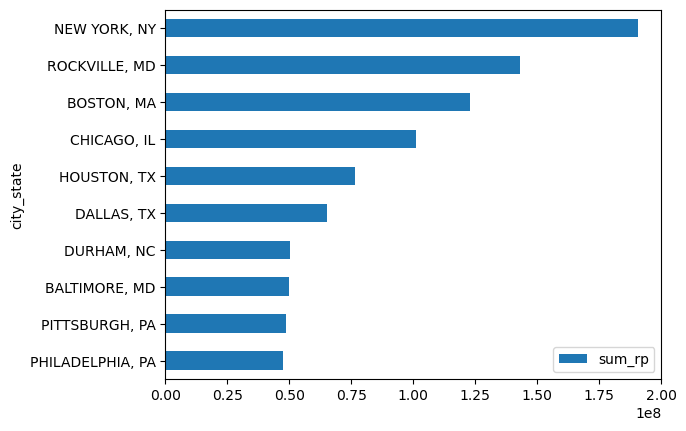

In [20]:
# Top 10, horizontal bar chart
df3[:10].plot.barh('city_state', 'sum_rp')
plt.gca().invert_yaxis()

## Research Payments by Therapeutic Area

In [21]:
query4 = """
-- Research Payments by Therapeutic Area
SELECT UPPER(Product_Category_or_Therapeutic_Area_1) AS therapeutic_area,
       COUNT(UPPER(Product_Category_or_Therapeutic_Area_1)) AS prod_ctg_count,
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 2) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
 GROUP BY ALL
 ORDER BY sum_rp DESC
"""

In [22]:
results = client.query(query4)

In [23]:
df4 = results.to_dataframe(create_bqstorage_client=False)

In [24]:
df4

,therapeutic_area,prod_ctg_count,sum_rp
0,ONCOLOGY,57661,1.449198e+09
1,IMMUNOLOGY,23322,1.758722e+08
2,NEUROLOGY,8446,1.579328e+08
3,INFECTIONS AND INFECTIOUS DISEASES,85622,1.516733e+08
4,VACCINES,6421,1.006824e+08
...,...,...,...
526,ARTHROPLASTY - IMPLANTS - ANATOMIC TOTAL SHOUL...,1,3.100000e+02
527,GAMMA-AMINOBUTYRIC ACID ANALOGS,1,2.950000e+02
528,KNEE & HIP - INSTRUMENTS - OSTEOTOMY - IBALANC...,1,6.700000e+01
529,LEADS,2,6.000000e+00


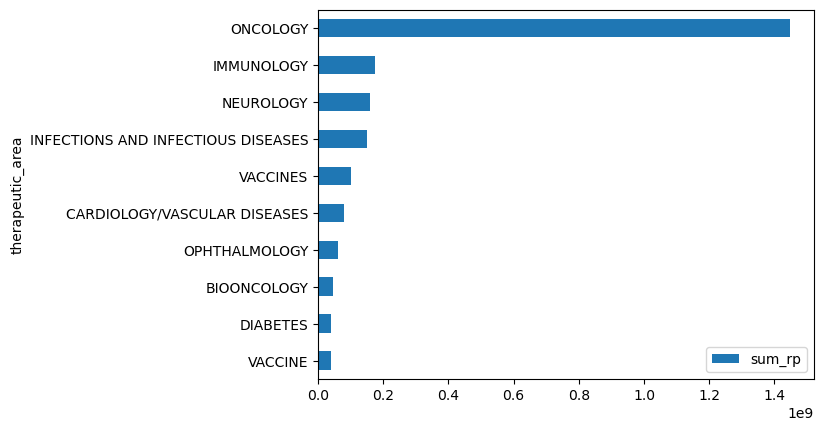

In [25]:
# Top 10, horizontal bar chart
df4[:10].plot.barh('therapeutic_area', 'sum_rp')
plt.gca().invert_yaxis()

## Research Payments by NCREs

In [26]:
query5 = """
-- Research Payments by NCRE
SELECT UPPER(Noncovered_Recipient_Entity_Name) as ncre_name,
       Recipient_State AS state,
       COUNT(UPPER(Noncovered_Recipient_Entity_Name)) AS ncre_count, 
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 1) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
 GROUP BY ALL
 ORDER BY sum_rp DESC
"""

In [27]:
results = client.query(query5)

In [28]:
df5 = results.to_dataframe(create_bqstorage_client=False)

In [29]:
df5

,ncre_name,state,ncre_count,sum_rp
0,NATIONAL INSTITUTE OF HEALTH,MD,121,142392910.5
1,MEMORIAL SLOAN KETTERING CANCER CENTER,NY,1352,70649940.7
2,ALLIANCE FOR CLINICAL TRIALS IN ONCOLOGY FOUND...,IL,316,42687072.9
3,"CLINEDGE, LLC - PPDS",FL,13567,22115659.8
4,NCI CLINICAL REPOSITORY,MD,12,20028558.1
...,...,...,...,...
17490,IU HEALTH GOSHEN CENTER FOR CANCER CARE,IN,1,0.0
17491,FLORIDA CANCER AFFILIATES - OCALA,FL,1,0.0
17492,"HEMATOLOGY ONCOLOGY ASSOCIATES, PC",OR,1,0.0
17493,ST. LUKE'S UNIVERSITY HOSPITAL,PA,1,0.0


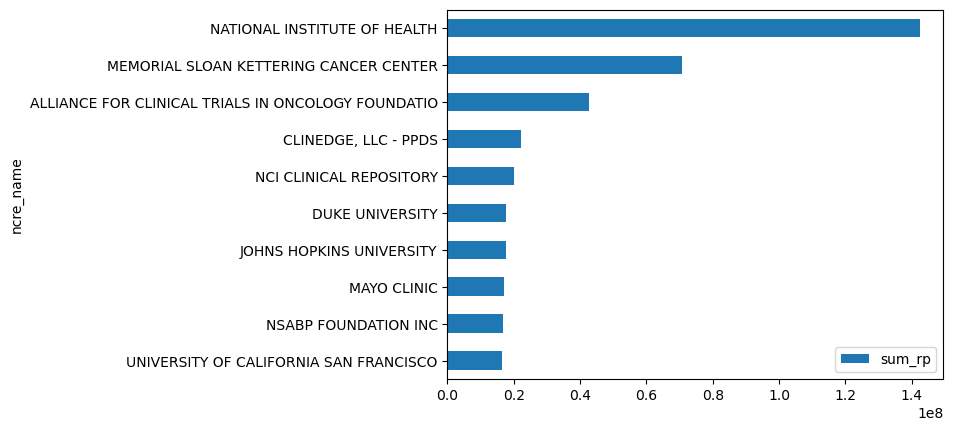

In [30]:
# Top 10, horizontal bar chart
df5[:10].plot.barh('ncre_name', 'sum_rp')
plt.gca().invert_yaxis()

## Research Payments by Manufacturer Company

In [31]:
query6 = """
-- Research Payments by Manufacturer Company
SELECT UPPER(Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name) AS mnf_comp_name,
       COUNT(UPPER(Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name)) AS mnf_comp_count,
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 2) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
 GROUP BY ALL
 ORDER BY sum_rp DESC
"""

In [32]:
results = client.query(query6)

In [33]:
df6 = results.to_dataframe(create_bqstorage_client=False)

In [34]:
df6

,mnf_comp_name,mnf_comp_count,sum_rp
0,NOVARTIS PHARMACEUTICALS CORPORATION,5772,3.435429e+08
1,MERCK SHARP & DOHME LLC,5172,3.045953e+08
2,PFIZER INC.,13899,2.366539e+08
3,ASTRAZENECA PHARMACEUTICALS LP,2575,1.610118e+08
4,"MODERNATX, INC.",85621,1.516607e+08
...,...,...,...
451,"AXSOME THERAPEUTICS, INC.",1,1.500000e+03
452,HARMONY BIOSCIENCES LLC,2,1.375000e+03
453,OLYMPUS WINTER & IBE GMBH,1,1.250000e+03
454,ACCURAY INCORPORATED,1,6.900000e+02


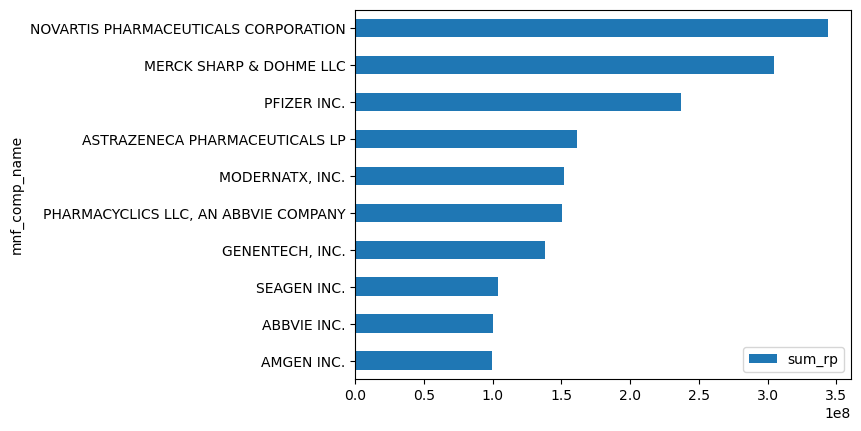

In [35]:
# Top 10, horizontal bar chart
df6[:10].plot.barh('mnf_comp_name', 'sum_rp')
plt.gca().invert_yaxis()

## Research Payments by Product

In [36]:
query7 = """
-- Research Payments by Manufacturer Company
-- Ordered by: `count_prod`, for Most-Used Product
SELECT Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1 AS ctg,
       UPPER(Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1) AS prod_name,
       UPPER(Product_Category_or_Therapeutic_Area_1) AS prod_ctg,
       COUNT(UPPER(Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1)) AS prod_count,
       COUNT(DISTINCT (UPPER(Noncovered_Recipient_Entity_Name))) AS ncre_count,
       UPPER(Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name) AS mnf_comp_name,
       Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State AS mnf_state,
       Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country AS mnf_country,
       ROUND(SUM(Total_Amount_of_Payment_USDollars), 2) AS sum_rp
  FROM `research-payments.noncovered_recipient_entity.ncre2023-cleaned`
-- WHERE Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1 = 'Drug'
 -- can be adjusted according to Product Category: Drug, Biological, Device, or Medical Supply
 GROUP BY ALL
 ORDER BY ncre_count DESC
"""

In [37]:
results = client.query(query7)

In [38]:
df7 = results.to_dataframe(create_bqstorage_client=False)

In [39]:
df7

,ctg,prod_name,prod_ctg,prod_count,ncre_count,mnf_comp_name,mnf_state,mnf_country,sum_rp
0,Biological,KEYTRUDA,ONCOLOGY,3395,1122,MERCK SHARP & DOHME LLC,NJ,United States,2.509096e+08
1,Drug,LEQVIO,CARDIOLOGY/VASCULAR DISEASES,2070,939,NOVARTIS PHARMACEUTICALS CORPORATION,NJ,United States,6.013529e+07
2,Biological,RINVOQ,IMMUNOLOGY,4147,542,ABBVIE INC.,IL,United States,1.433488e+07
3,Drug,SOTYKTU,IMMUNOLOGY,550,387,"E.R. SQUIBB & SONS, L.L.C.",NJ,United States,1.079339e+07
4,Drug,TREMFYA,IMMUNOLOGY,3314,374,"JANSSEN RESEARCH & DEVELOPMENT, LLC",NJ,United States,1.687152e+07
...,...,...,...,...,...,...,...,...,...
1680,Device,ENDOFLIP,MOTILITY TESTING,1,1,"MEDTRONIC, INC.",MN,United States,4.296000e+03
1681,Device,SCORPIO,KNEES,1,1,STRYKER CORPORATION,MI,United States,3.653500e+03
1682,Device,CLINITEK ADVANTUS ANALYZER,DX - DIAGNOSTICS INCL. ALL PRODUCTS AND SERVICES,1,1,"SIEMENS MEDICAL SOLUTIONS USA, INC.",PA,United States,2.580000e+04
1683,Biological,SARCLISA,ONCOLOGY,1,1,GENZYME CORPORATION,MA,United States,1.299258e+05


In [40]:
df7['prod_by_mnf'] = [', '.join(i) 
    for i in zip(df7['prod_name'], df7['mnf_comp_name'])]

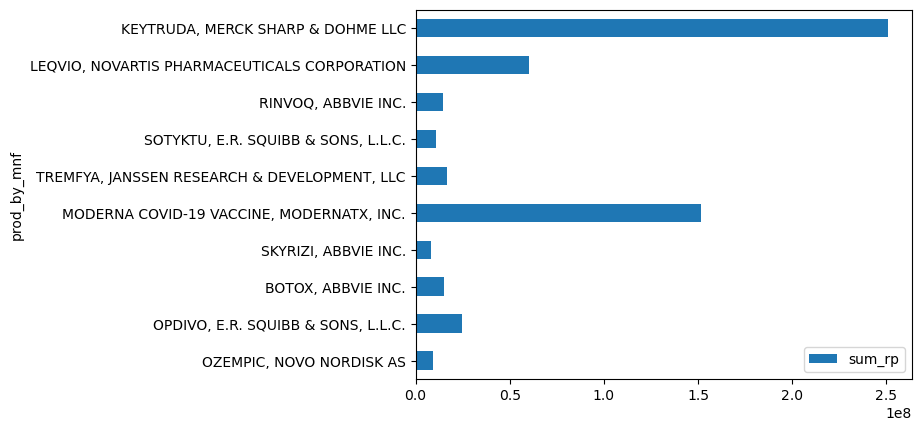

In [41]:
# Top 20 most-used product, horizontal bar chart
# visualized by total research payments
df7[:10].plot.barh('prod_by_mnf', 'sum_rp')
plt.gca().invert_yaxis()

With these queries in mind, they could help us in measuring what matters for our dashboard. In the next section, We'll connect the cleaned data of `ncre2023-cleaned` on BigQuery, and utilize the data into a dashboard in Tableau.